In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

data = pd.read_csv('../data/dataset.csv')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [8]:
with open('../data/X_train.pkl', 'rb') as f1, open('../data/X_test.pkl', 'rb') as f2, open('../data/y_train.pkl', 'rb') as f3, open('../data/y_test.pkl', 'rb') as f4:
    X_train, X_test, y_train, y_test = pd.read_pickle(f1), pd.read_pickle(f2), pd.read_pickle(f3), pd.read_pickle(f4)

KNN Baseline Model

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6474576271186441


Hyperparameter Tuning using GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    verbose=2
)

grid_search.fit(X_train, y_train)

final_predictions = grid_search.predict(X_test)

print(f'GridSearch CV best score : {grid_search.best_score_}\n')
print('Parameters that give the best results :','\n', (grid_search.best_params_))
print('\nEstimator that was chosen by the search :','\n', (grid_search.best_estimator_))

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p

c:\Users\Gor7a\anaconda3\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [25]:
print(f'GridSearch CV accuracy: {grid_search.score(X_test, y_test)}')

GridSearch CV accuracy: 0.6937853107344633


In [26]:
with open('label_encoder.pkl', 'rb') as file:
    label_encoder = pd.read_pickle(file)

print("\nClassification Report:\n", classification_report(y_test, final_predictions, target_names=label_encoder.classes_))


Classification Report:
               precision    recall  f1-score   support

     Dropout       0.82      0.62      0.71       316
    Enrolled       0.38      0.21      0.27       151
    Graduate       0.69      0.92      0.79       418

    accuracy                           0.69       885
   macro avg       0.63      0.58      0.59       885
weighted avg       0.68      0.69      0.67       885



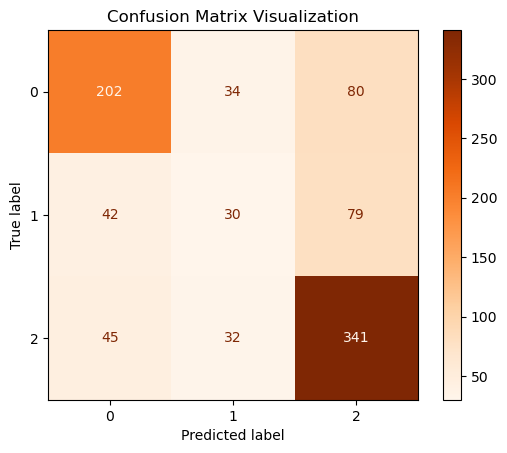

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

conf_m = confusion_matrix(y_test, y_pred)
show = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=grid_search.classes_)
show.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix Visualization")
plt.show()